<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Regularization
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 4: Topic 42</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
from sklearn.datasets import load_sample_images
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2

#### Regularization
- Retain complexity of neural network: many weights to learn interesting relationships
- Make our weights less susceptible to overfitting

**Getting neural networks to perform really well**

In neural networks, two main forms of regularization:
- L2 Regularization (something familiar)
- Dropout Regularization (something a little new)

**L2 Regularization**

- Add penalty on weight **matrices**.
$$ J \rightarrow J' $$
$$ J = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) $$
$$ J' = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) + \frac{\lambda}{2} \sum_{l=1}^L \lVert  W^{[l]}   \rVert_F^2 $$

where $F$ denotes the Frobenius norm.

Frobenius norm is square root of sum of of element-wise square:
i.e. 
$$ \lVert  A   \rVert_F = \sqrt{\sum_{i,j} A_{ij}^2 }$$

In [13]:
import numpy as np
from numpy.linalg import norm

In [14]:
A = np.array([[1,2],[0,3]])
A

array([[1, 2],
       [0, 3]])

In [15]:
norm(A, 'fro')

3.7416573867739413

In [19]:
np.sqrt(1**2 + 0**2 + 2**2 + 3**2)

3.7416573867739413

Modiied objective functon:

$$ J' = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) + \frac{\lambda}{2} \sum_{l=1}^L \lVert  W^{[l]}   \rVert_F^2 $$

Regularization serves to penalize any particular weight from being too large:
- smoothens/redistributes weights for each weight matrix
- aids in generalization

L2 regularization: often known as weight decay
- Perspective: gradient descent
$$ J' = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) + \frac{\lambda}{2} \sum_{l=1}^L \lVert  W^{[l]}   \rVert_F^2 $$
$$ W^{[l]} \rightarrow W^{[l]} - \alpha \frac{\partial J'}{\partial W^{[l]}} $$ 

$$ J = \sum_{i=1}^m \frac{1}{m}L(y_i, \hat{y}_i) $$
$$ W^{[l]} \rightarrow \Big(W^{[l]}  - \alpha \frac{\lambda}{2 m}  W^{[l]} \Big) - \alpha \frac{\partial J}{\partial W^{[l]}}$$ 

- At each iteration regularization tries to reduce magnitude of weight matrix.

#### Implementing L2 regularization in Keras

In [2]:
# creates keras regularizer object
from tensorflow.keras.regularizers import L2

L2 regularizer object takes in $\lambda$ parameter as argument

In [3]:
reg = L2(3e-3) # 1e-5 to .1

Implementing regularization to weights in Keras:
- Dense(kernel_regularizer = __)
- takes in string ('l2') or regularizer object

Less common but also used:

- can apply regularization to bias terms 
- Dense(bias_regularizer = __)

In [4]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train/255 # normalization
x_test = x_test/255

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)

In [5]:
model_images = Sequential()
model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
model_images.add(Dense(32, activation='relu', kernel_regularizer = reg)) # take in regularizer
model_images.add(Dense(8, activation='relu', kernel_regularizer = reg))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

In [6]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [7]:
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=50, batch_size= 32, validation_split = 0.2)

Epoch 1/50
1500/1500 [==============================] - 1s 954us/step - loss: 0.7322 - accuracy: 0.8334 - val_loss: 0.4648 - val_accuracy: 0.9153
Epoch 2/50
1500/1500 [==============================] - 1s 863us/step - loss: 0.4463 - accuracy: 0.9230 - val_loss: 0.4020 - val_accuracy: 0.9329
Epoch 3/50
1500/1500 [==============================] - 1s 880us/step - loss: 0.3975 - accuracy: 0.9352 - val_loss: 0.3699 - val_accuracy: 0.9415
Epoch 4/50
1500/1500 [==============================] - 1s 838us/step - loss: 0.3702 - accuracy: 0.9395 - val_loss: 0.3417 - val_accuracy: 0.9471
Epoch 5/50
1500/1500 [==============================] - 1s 814us/step - loss: 0.3471 - accuracy: 0.9441 - val_loss: 0.3527 - val_accuracy: 0.9421
Epoch 6/50
1500/1500 [==============================] - 1s 851us/step - loss: 0.3325 - accuracy: 0.9472 - val_loss: 0.3245 - val_accuracy: 0.9516
Epoch 7/50
1500/1500 [==============================] - 1s 896us/step - loss: 0.3174 - accuracy: 0.9505 - val_loss: 0.3083 -

In [8]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

array([[6.6176881e-07, 3.5496073e-06, 4.5660939e-03, ..., 9.9449921e-01,
        3.6454289e-06, 1.2059909e-04],
       [3.8025980e-06, 8.6014933e-04, 9.9206650e-01, ..., 1.0267524e-05,
        1.7959693e-03, 3.6960530e-09],
       [1.9496068e-07, 9.6943486e-01, 3.5705219e-03, ..., 1.5650660e-02,
        3.9285747e-03, 1.3602295e-04],
       ...,
       [2.1371558e-09, 1.5905838e-05, 2.4892710e-08, ..., 1.8314160e-05,
        2.1190942e-06, 3.8377516e-04],
       [3.5624031e-05, 8.6543278e-06, 1.6237863e-06, ..., 4.4689699e-07,
        3.3432231e-03, 2.1552754e-05],
       [1.9215487e-04, 4.5566996e-08, 1.9630371e-04, ..., 1.7863668e-08,
        4.4313347e-06, 2.0552555e-09]], dtype=float32)

In [11]:
model_images.evaluate(x_test, y_tt_one_hot)

313/313 [==============================] - 0s 1ms/step - loss: 0.2157 - accuracy: 0.9635


[0.2156781703233719, 0.9635000228881836]

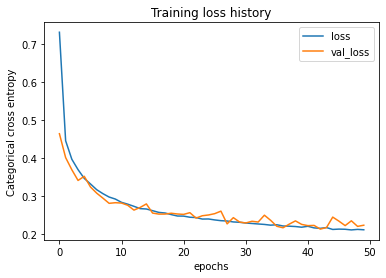

In [9]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

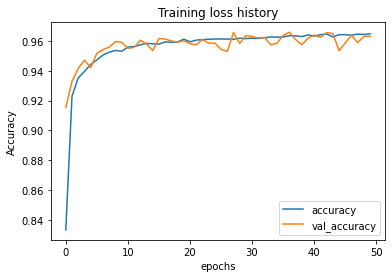

In [10]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Better validation accuracy:
- 94.5\% to 96.3\% with regularization
- no overfitting

In [12]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

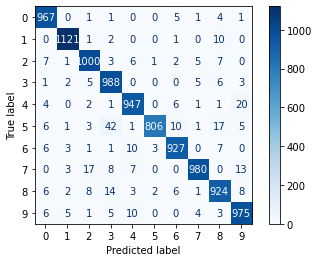

In [13]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Regularization: 
- key component to training deeper networks (tend to overfit without regularization)
- learn higher order features, but don't overtrain on specifics.

In [14]:
deepermodel_images = Sequential()
deepermodel_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
deepermodel_images.add(Dense(32, activation='relu', kernel_regularizer = reg)) # take in regularizer
deepermodel_images.add(Dense(16, activation='relu', kernel_regularizer = reg)) # add another layer
deepermodel_images.add(Dense(16, activation='relu', kernel_regularizer = reg)) # add another layer
deepermodel_images.add(Dense(10, activation='relu', kernel_regularizer = reg))
deepermodel_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

deepermodel_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [15]:
# will take a while
history_deepermnist = deepermodel_images.fit(x_train, y_tr_one_hot, epochs=200, batch_size= 32, validation_split = 0.2)

Epoch 1/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7959 - accuracy: 0.8341 - val_loss: 0.5136 - val_accuracy: 0.9178
Epoch 2/200
1500/1500 [==============================] - 1s 967us/step - loss: 0.4946 - accuracy: 0.9224 - val_loss: 0.4525 - val_accuracy: 0.9362
Epoch 3/200
1500/1500 [==============================] - 1s 912us/step - loss: 0.4445 - accuracy: 0.9336 - val_loss: 0.4262 - val_accuracy: 0.9376
Epoch 4/200
1500/1500 [==============================] - 1s 968us/step - loss: 0.4132 - accuracy: 0.9393 - val_loss: 0.3997 - val_accuracy: 0.9435
Epoch 5/200
1500/1500 [==============================] - 1s 911us/step - loss: 0.3938 - accuracy: 0.9433 - val_loss: 0.3857 - val_accuracy: 0.9451
Epoch 6/200
1500/1500 [==============================] - 1s 923us/step - loss: 0.3771 - accuracy: 0.9461 - val_loss: 0.4099 - val_accuracy: 0.9320
Epoch 7/200
1500/1500 [==============================] - 1s 921us/step - loss: 0.3640 - accuracy: 0.9489 - val_loss: 0.3

In [16]:
#evaluate test accuracy
deepermodel_images.evaluate(x_test, y_tt_one_hot)

313/313 [==============================] - 0s 1ms/step - loss: 0.2247 - accuracy: 0.9639


[0.22465170919895172, 0.9639000296592712]

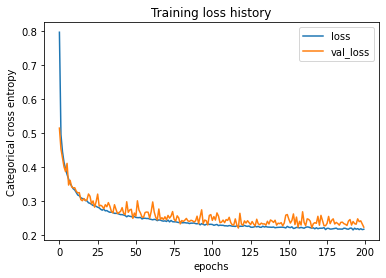

In [17]:
train_deepmnist_history = pd.DataFrame(history_deepermnist.history)
train_deepmnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_deepmnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

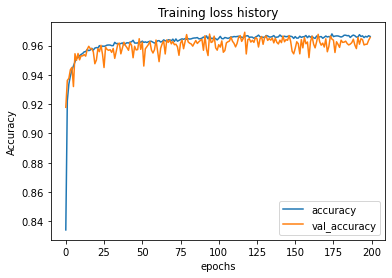

In [18]:
col_list = ['accuracy', 'val_accuracy']
train_deepmnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Not overfitting even while adding much more complexity:
- in this case, not gaining much either

To do better:
- try a different regularization technique
- may need to think harder about network architecture

#### Dropout Regularization
- Architecture based strategy.

On each forward/backprop iteration:
- given layer with dropout
- shut off activations to randomly selected nodes in layer

<img src = "Images/dropout_network.gif" >

- Set $p^{[l]}$  uniform probability of node dropout for given layer
- each train cycle: kills different activations

Dead nodes dont contribute to weight updates in backprop.

after many train cycles: have learned weights:
- contributions from many different networks learning different things

<img src = "Images/Deeper_network.jpg">

Validation/test phase:
- use all nodes and learned weights.
- make prediction.

**Why it works as regularization**
- network learns not to trust in any one subset of weights: unlikely any particular weight subset gets too big.
- distributes weights in way that is robust to network noise (random dropout): generalizes well. 

#### Dropout in Keras

- Simply add it as though it were a layer. It will apply to the immediately preceding layer.

In [19]:
from tensorflow.keras.layers import Dropout

Dropout() takes in the dropout probability as a constructor argument:
- Dropout($p$) after some of the hidden layers.
- $p \in [0.1, 0.5]$ as good range to try. 0.5 is pretty strong.

In [20]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

**Define model**

In [23]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2)) # dropout on previous activations
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.1)) # dropout
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation ='softmax'))

# compile model
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Some tips:
- Dropout earlier in network or inputs. Don't put on final layers.
- Try faster learning rates in optimizer

In [24]:
# will take a while
history_dropoutmnist = model.fit(x_train, y_tr_one_hot, epochs=200, batch_size= 32, validation_split = 0.2)

Epoch 1/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7848 - accuracy: 0.7470 - val_loss: 0.3592 - val_accuracy: 0.9053
Epoch 2/200
1500/1500 [==============================] - 1s 985us/step - loss: 0.5238 - accuracy: 0.8416 - val_loss: 0.3028 - val_accuracy: 0.9161
Epoch 3/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4781 - accuracy: 0.8583 - val_loss: 0.2697 - val_accuracy: 0.9283
Epoch 4/200
1500/1500 [==============================] - 1s 991us/step - loss: 0.4550 - accuracy: 0.8639 - val_loss: 0.2679 - val_accuracy: 0.9218
Epoch 5/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4301 - accuracy: 0.8716 - val_loss: 0.2503 - val_accuracy: 0.9288
Epoch 6/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4163 - accuracy: 0.8771 - val_loss: 0.2392 - val_accuracy: 0.9342
Epoch 7/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4017 - accuracy: 0.8808 - val_loss: 0.2318 - va

Accuracy on train set will be lower in any given cycle:
- some activation killed randomly on training.

Performance on validation will be high:
- uses full network with learned weights for validation

Not overtraining despite high model capacity:
- many hidden layers

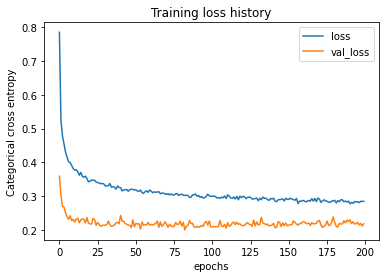

In [25]:
train_dropoutmnist_history = pd.DataFrame(history_dropoutmnist.history)
train_dropoutmnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_dropoutmnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

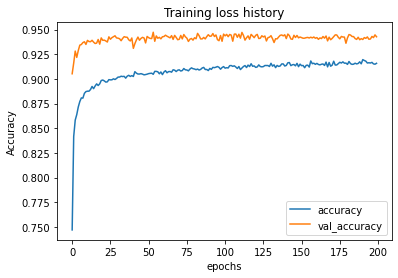

In [26]:
col_list = ['accuracy', 'val_accuracy']
train_dropoutmnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Evaluate on test set.

In [27]:
model.evaluate(x_test, y_tt_one_hot)

313/313 [==============================] - 0s 982us/step - loss: 0.2204 - accuracy: 0.9421


[0.22043749690055847, 0.9420999884605408]

#### Dropout regularization in conjunction with L2:

- can be used to train very deep networks
- model complex relationships without overfitting
- works best in these cases with a lot of data

Next up:
- doing much better with a more suitable network architecture
- Convolutional Neural Networks (CNNs)